# **Assignment 15**

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_style('darkgrid')
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Dataset
df = pd.read_csv('/content/Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# **Data Exploration**

In [4]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.shape

(400, 11)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:

df[df.duplicated()].shape

(0, 11)

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [10]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

# **Feature Engineering**

In [11]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

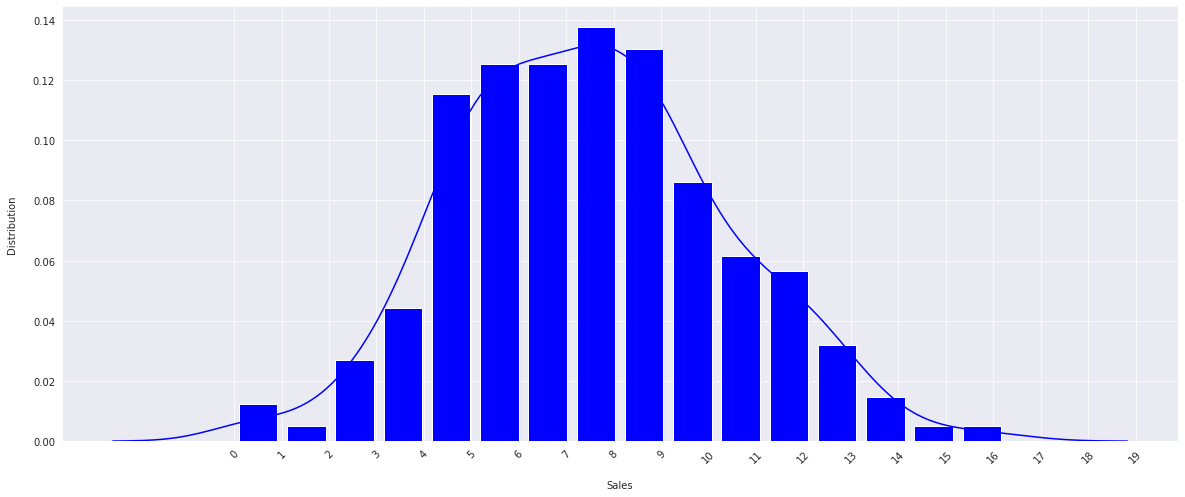

In [12]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [13]:
df.Sales.max()

16.27

In [14]:
16.270000/3

5.423333333333333

In [15]:
5.423333333333333*2

10.846666666666666

In [16]:
5.423333333333333*3

16.27

In [17]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [18]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [20]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [21]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

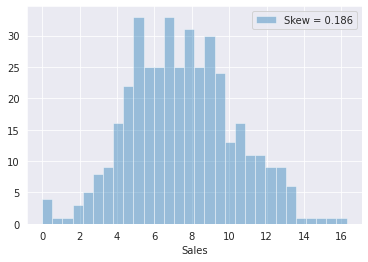

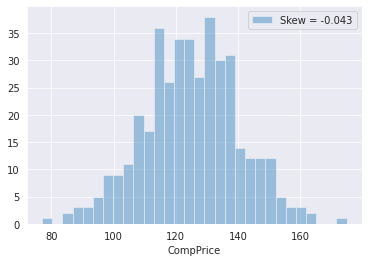

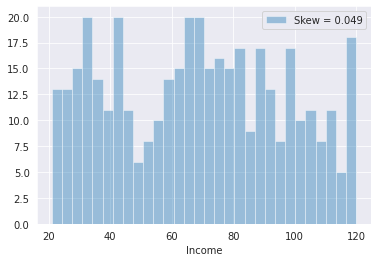

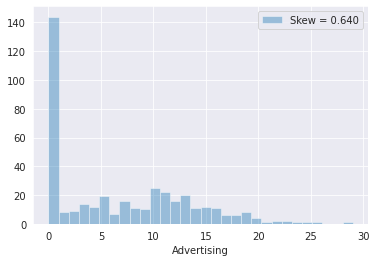

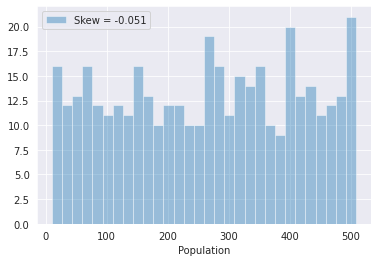

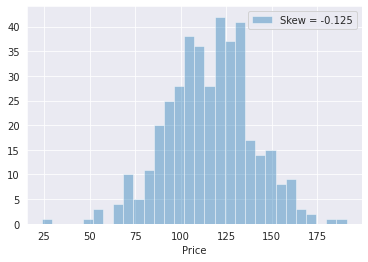

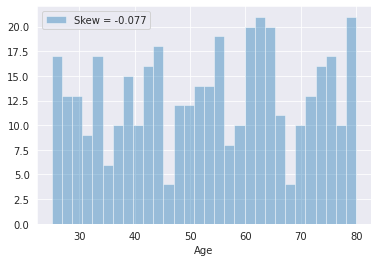

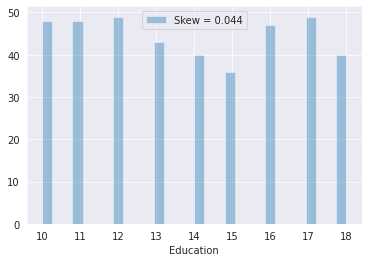

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [23]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 0 observations with more than 2 outliers


In [24]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

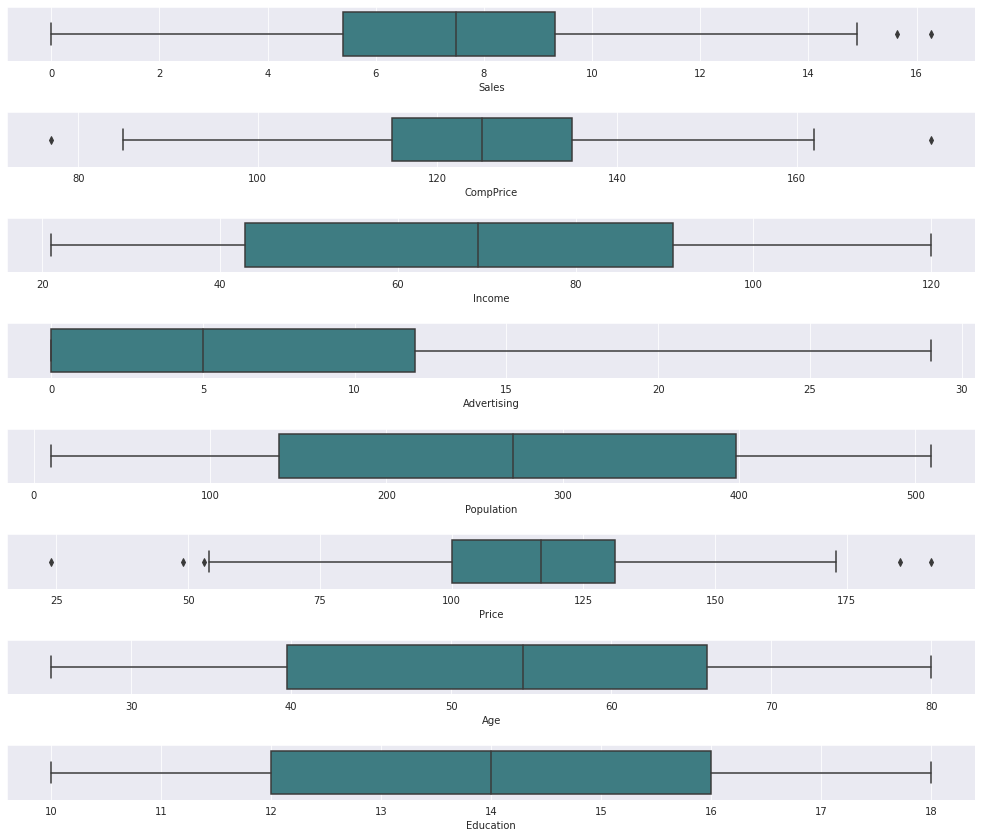

In [25]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

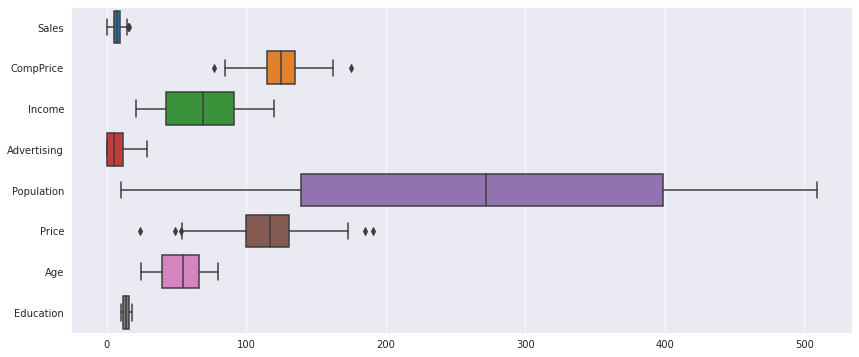

In [26]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

<Figure size 576x576 with 0 Axes>

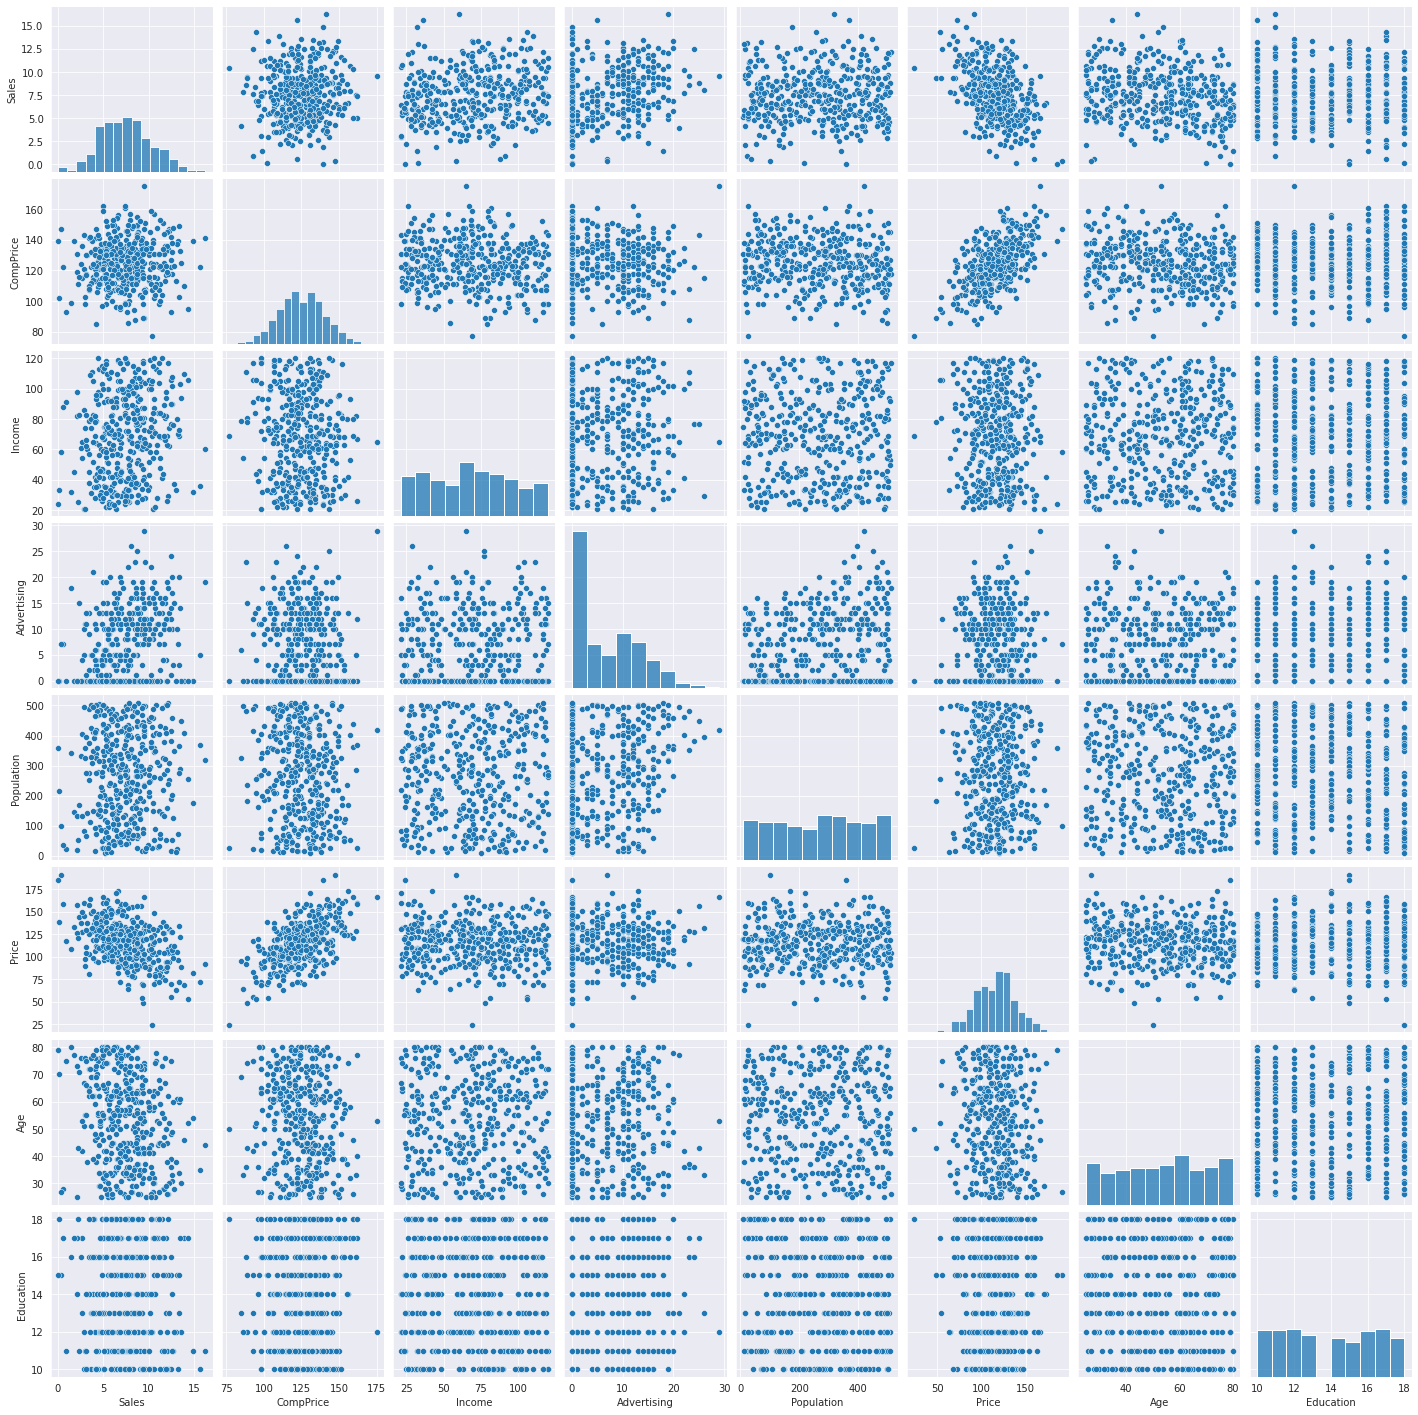

In [27]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<AxesSubplot:>

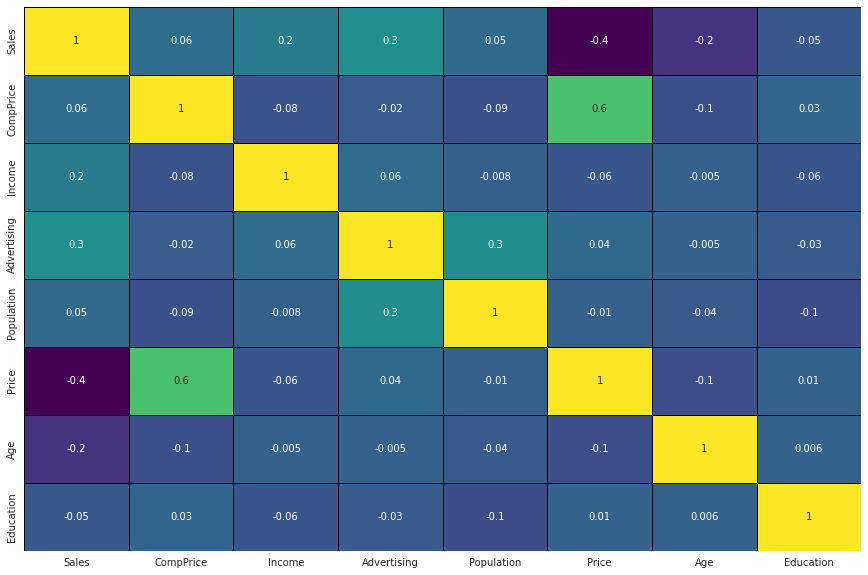

In [28]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


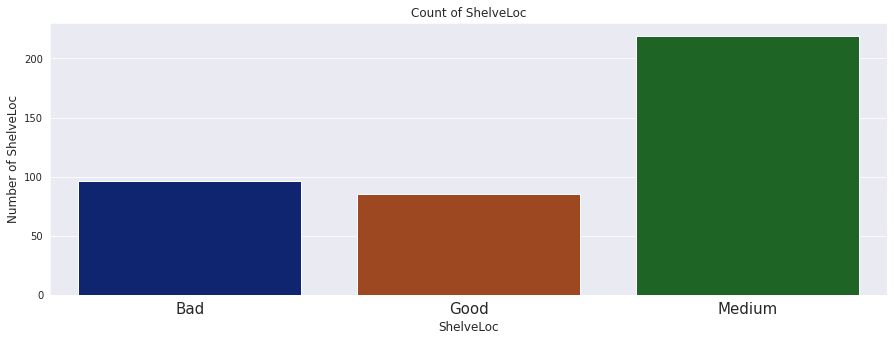

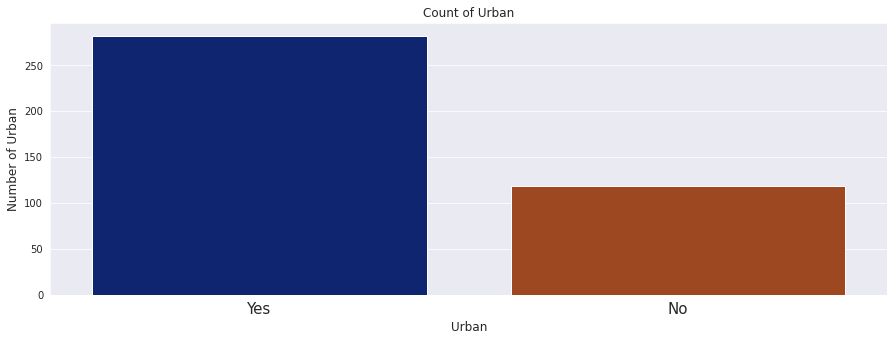

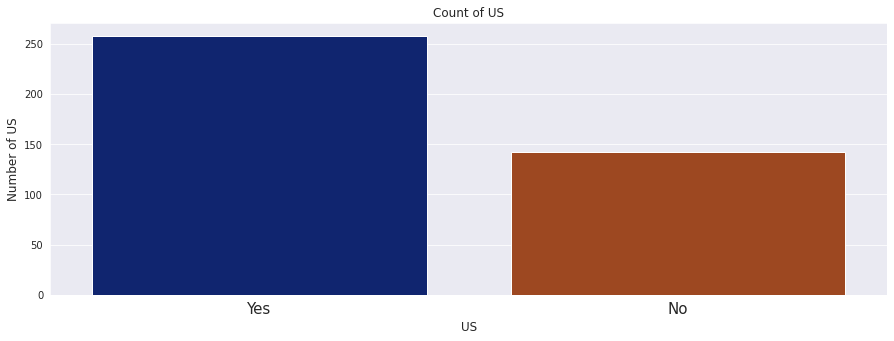

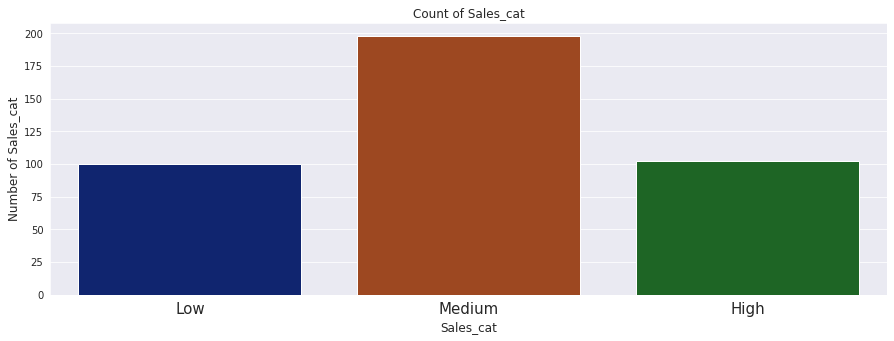

In [29]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df1[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=df1, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

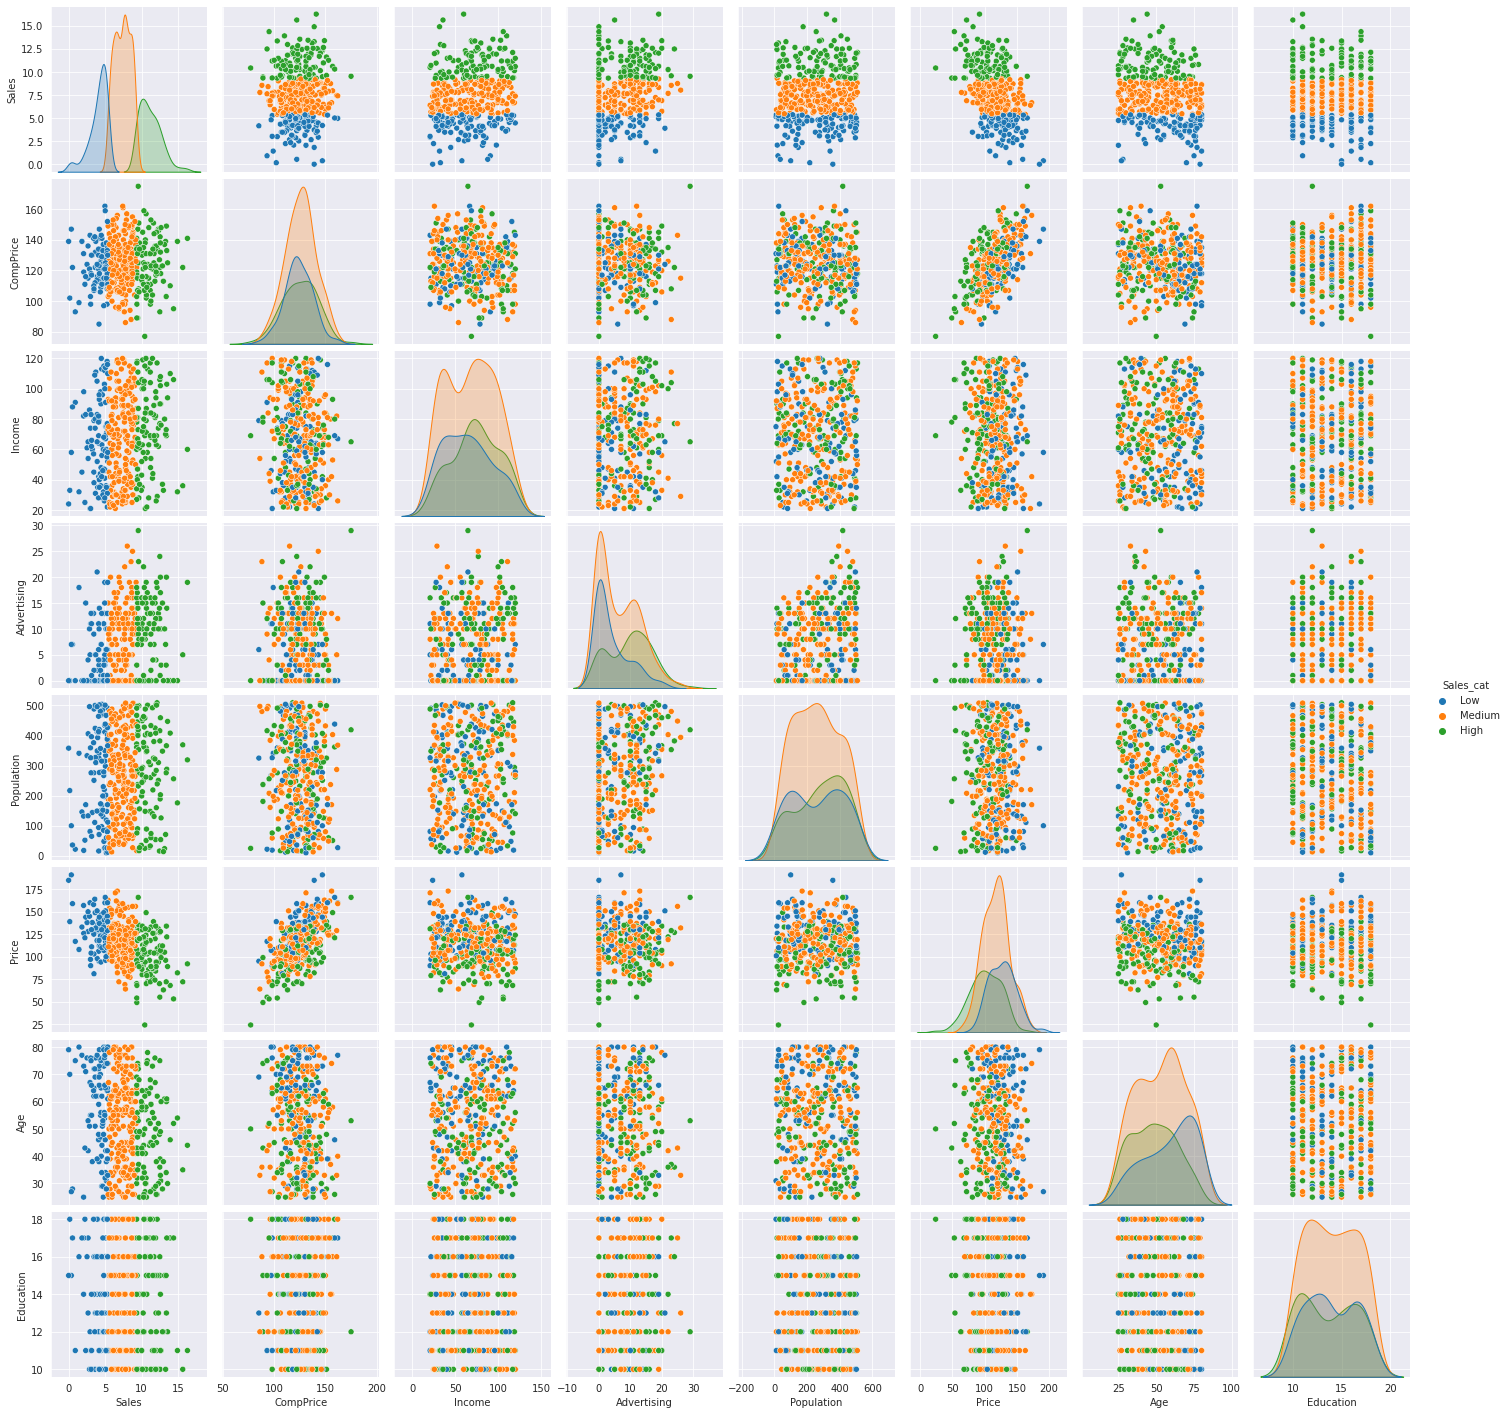

In [30]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df1, hue = 'Sales_cat')

In [31]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

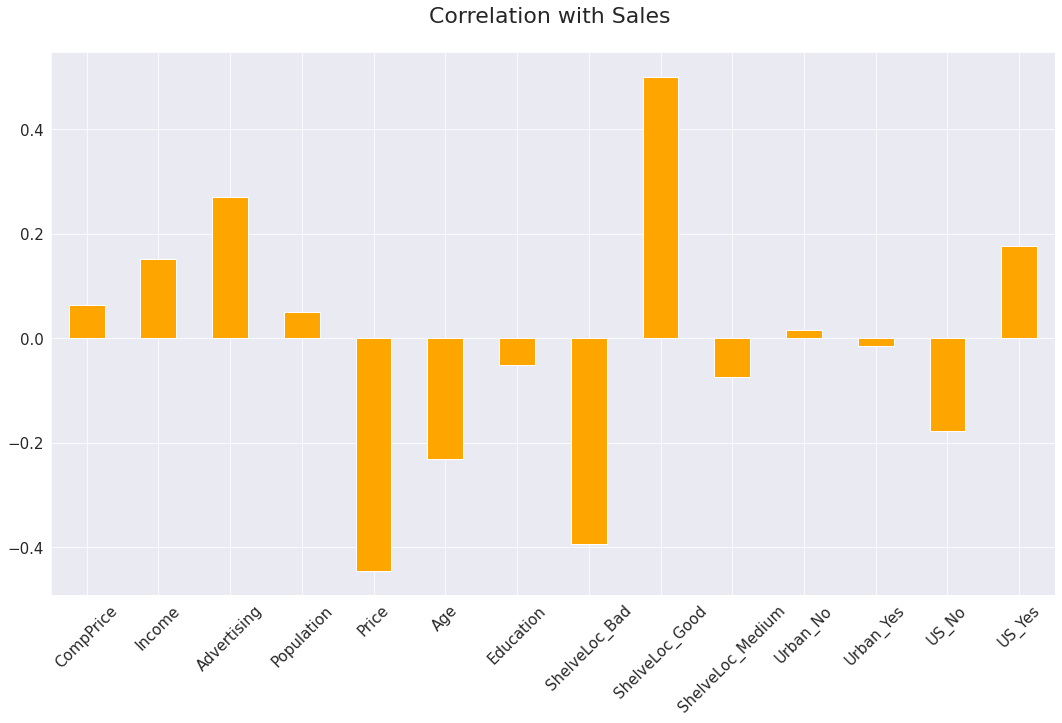

In [32]:
data2 = data_.copy()

correlations = data2.corrwith(df1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

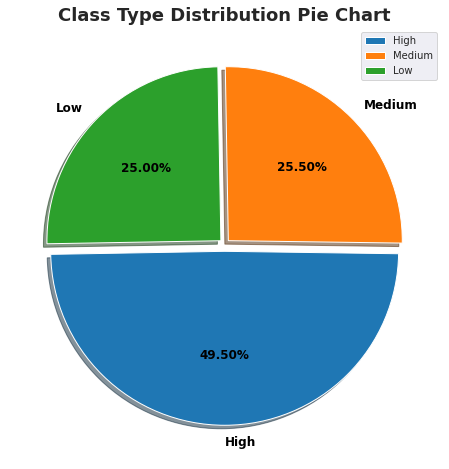

In [33]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),
       labels=df1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [34]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

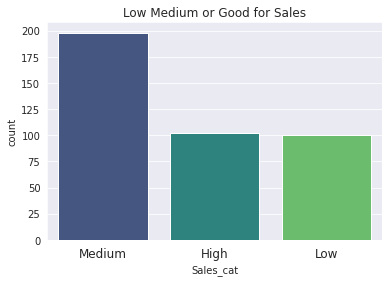

In [35]:
sns.countplot(x='Sales_cat', data=df1, palette = 'viridis', 
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

In [36]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [37]:
data_['Sales'] = df1.Sales_cat
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [38]:
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [39]:
# split into input (X) and output (y) variables
X = data_.iloc[:, :-1]

y=  data_.Sales

In [40]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [41]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [42]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [43]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

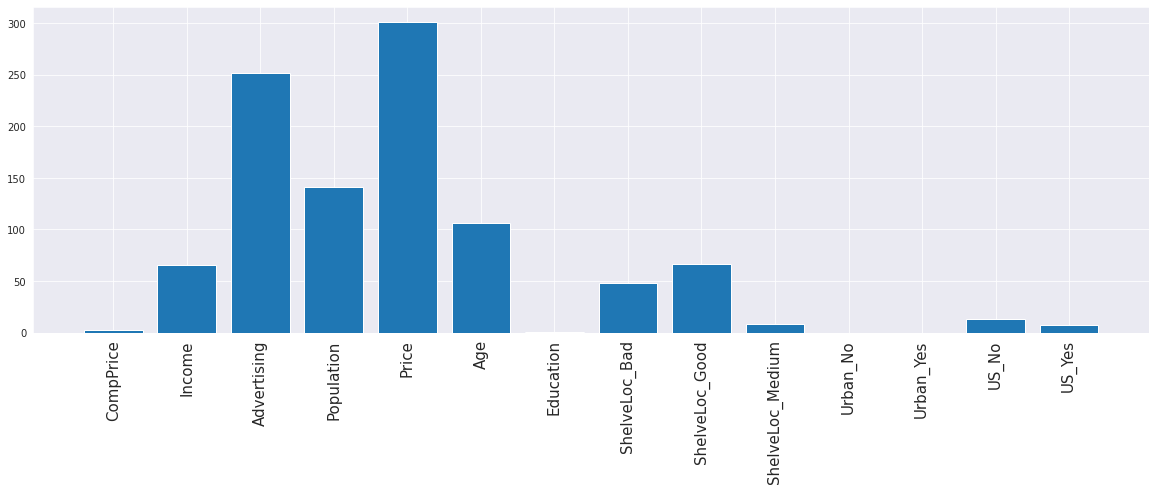

In [44]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

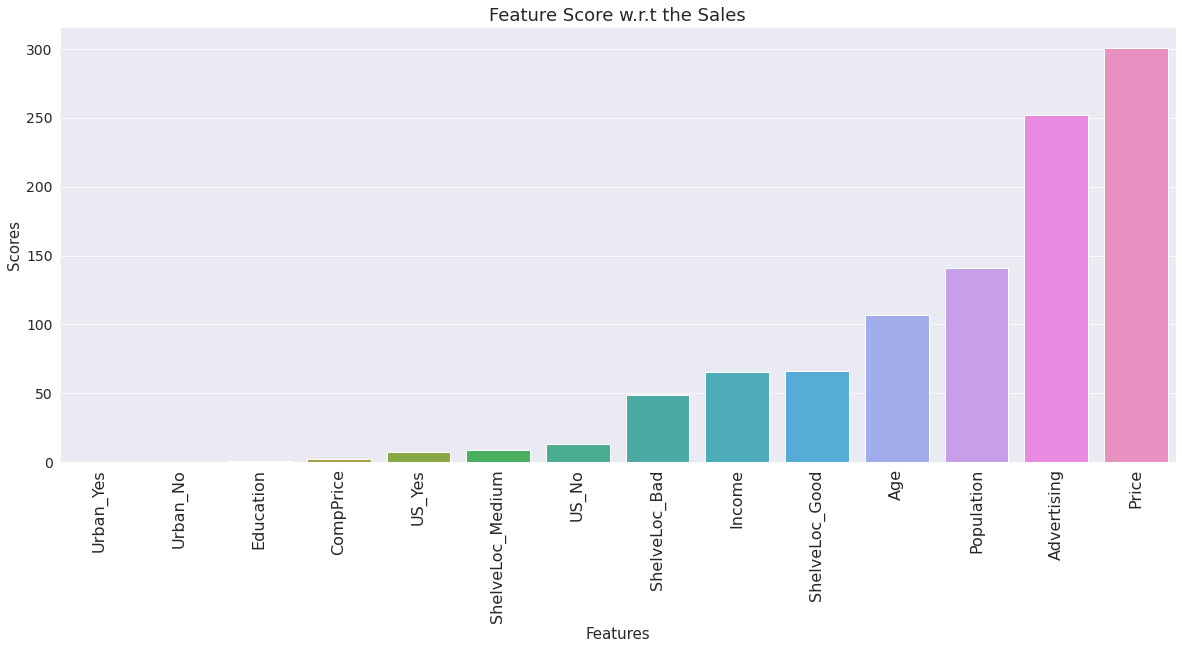

In [45]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [46]:
model_data = data_[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

# **Random Forest Built-in Feature Importance**

In [49]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [50]:
y.unique()

array([0, 2, 1])

In [51]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [53]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [54]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


In [59]:
x = model_data.drop(['Sales'], axis=1)
y = model_data['Sales']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [60]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


# **Random Forest**

In [61]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [62]:
loc = np.array(score_array).max()
score_array.index(loc)+1

34

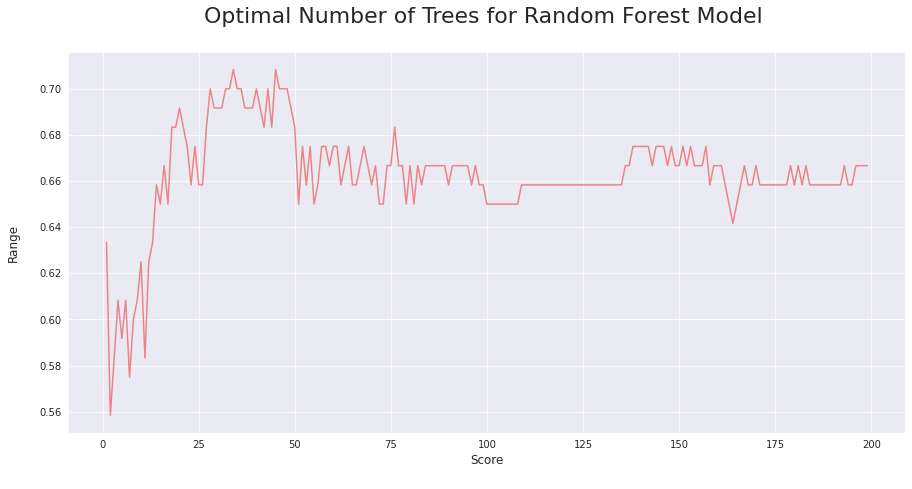

In [63]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [65]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4,
                       n_estimators=195, random_state=42)

In [66]:
df1.Sales_cat.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

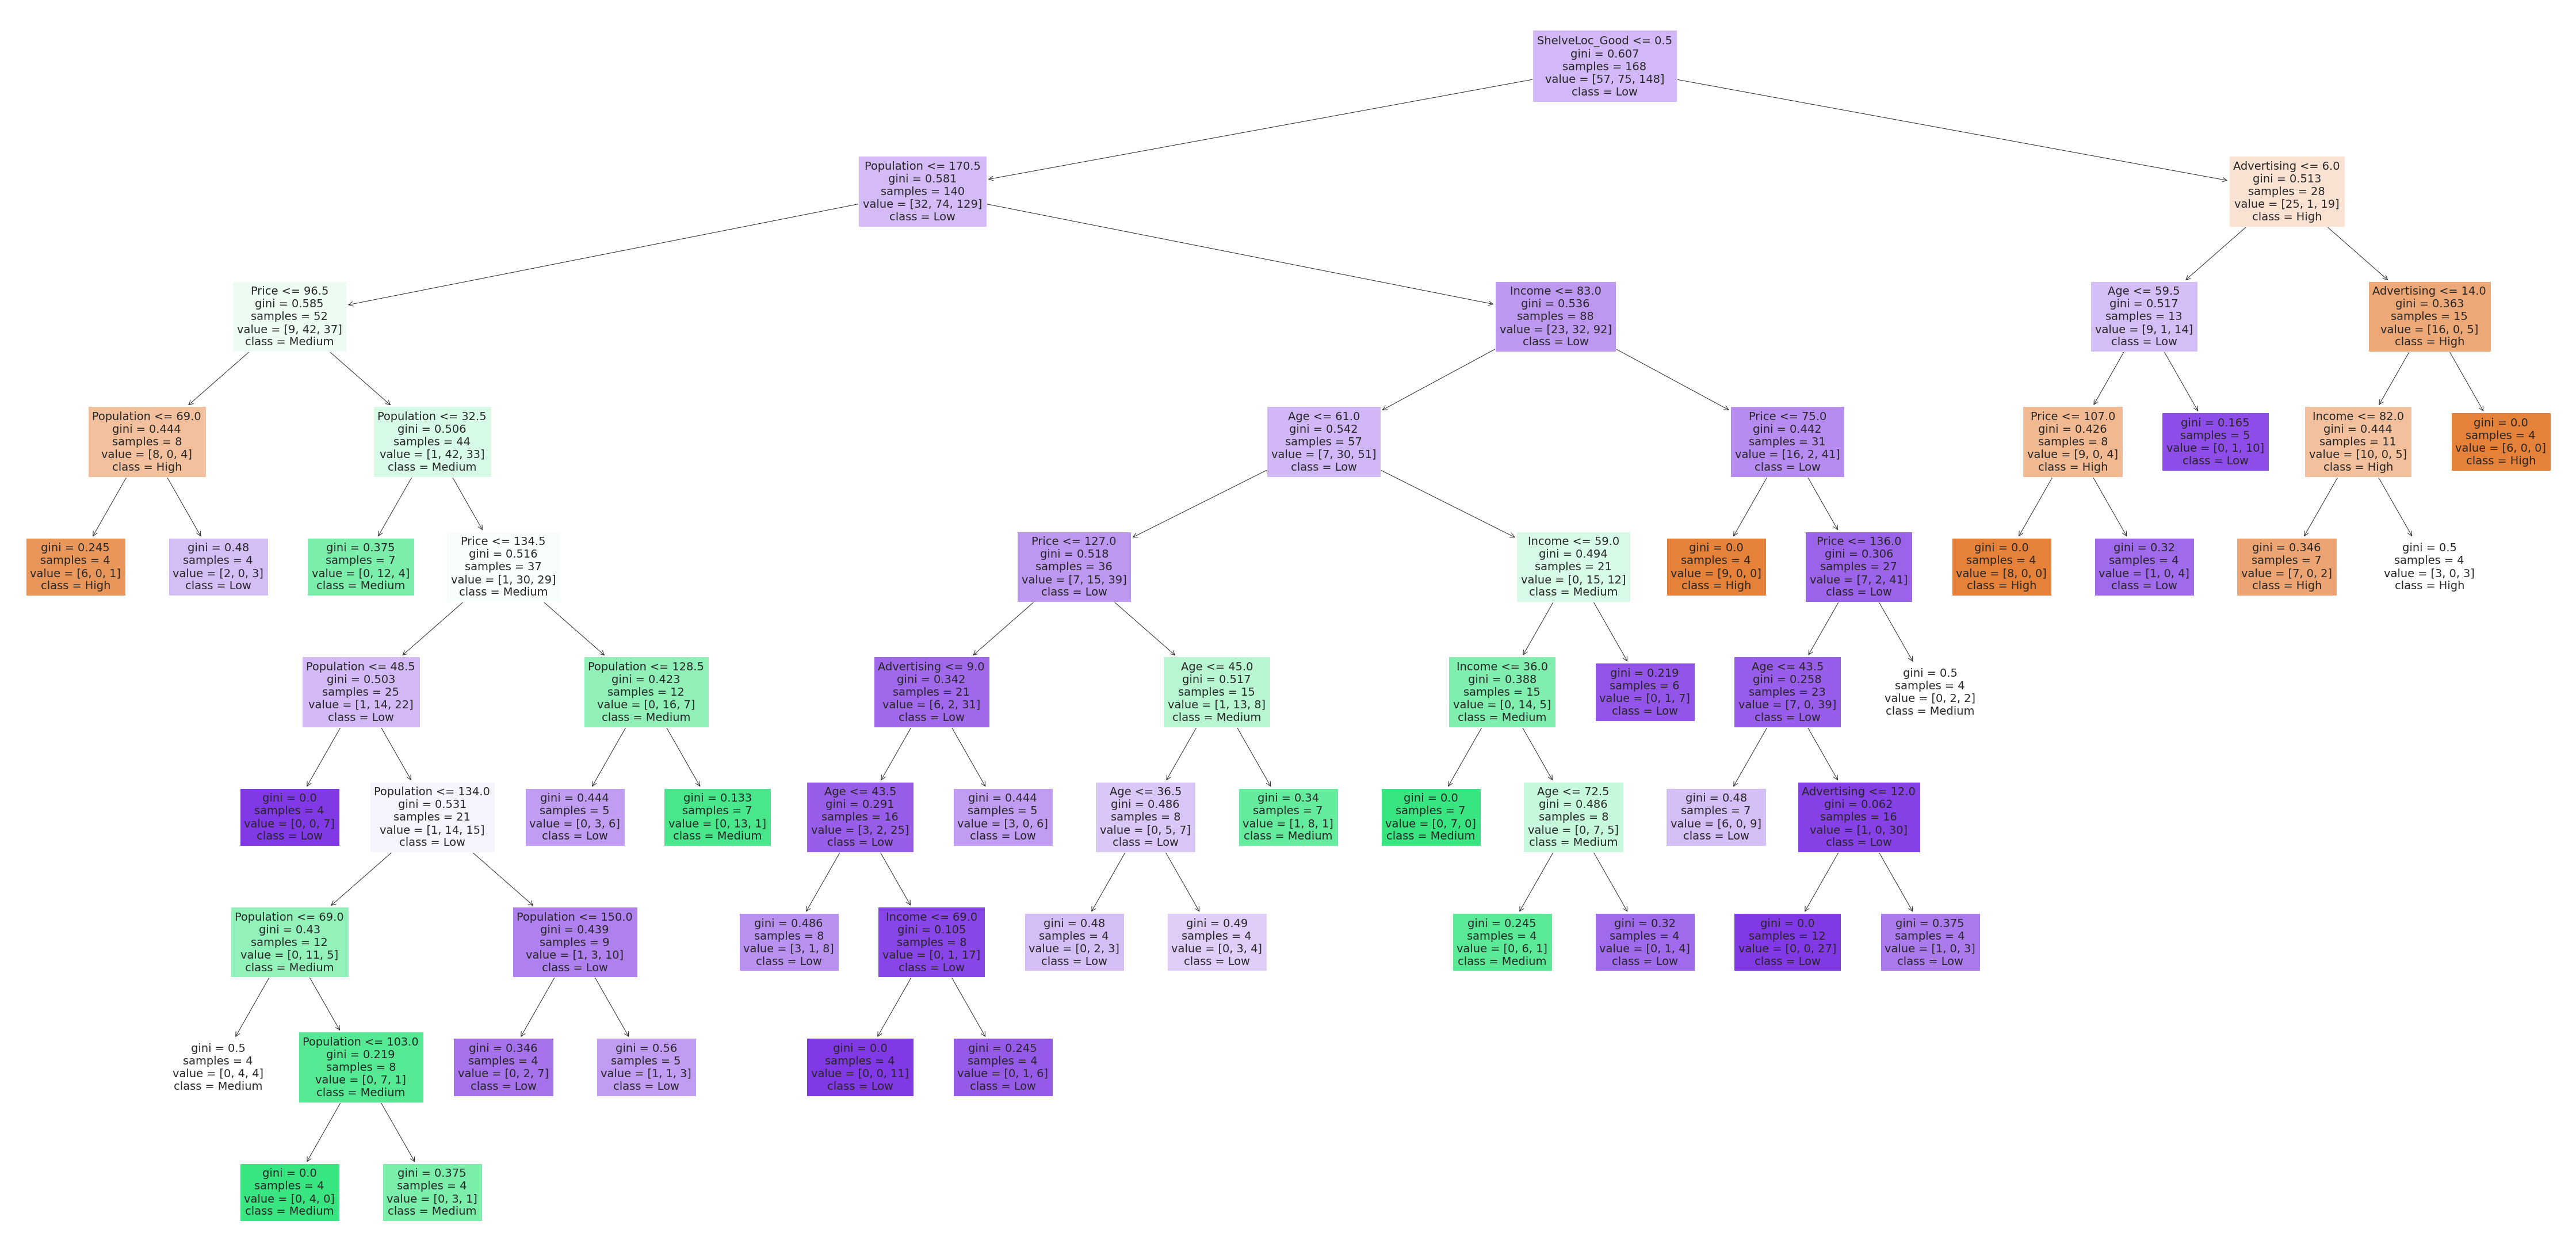

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,class_names=df1.Sales_cat.unique(),filled=True)
plt.show()